# Data Visualization
dov-summer school 2019, peter.gruber@usi.ch

Here is the link to the [talk of Hans Rosling](https://www.ted.com/talks/hans_rosling_at_state#t-633880)

In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import sklearn.linear_model

## A classic for a start: the Anscombe datasets

In [5]:
ans01 = pd.read_csv('anscombe01.csv')
ans02 = pd.read_csv('anscombe02.csv')
ans03 = pd.read_csv('anscombe03.csv')
ans04 = pd.read_csv('anscombe04.csv')

def fivenum(dataset):
    means = list(np.mean(dataset))
    stds  = list(np.std(dataset))
    corr  = np.corrcoef(dataset.x,dataset.y)[1][0]
    model = sklearn.linear_model.LinearRegression()
    model.fit(np.array(dataset.x).reshape(-1, 1), np.array(dataset.y))    
    resultList = means + stds + [corr] +[model.intercept_,model.coef_[0]]
    resultList = [round(item,2) for item in resultList]
    return resultList

In [6]:
# These datasets seem pretty similar
print(fivenum(ans01))
print(fivenum(ans02))
print(fivenum(ans03))
print(fivenum(ans04))

#mean(x) mean(y) sd(x) sd(y) corr(x,y) alpha beta

[9.0, 7.5, 3.16, 1.94, 0.82, 3.0, 0.5]
[9.0, 7.5, 3.16, 1.94, 0.82, 3.0, 0.5]
[9.0, 7.5, 3.16, 1.94, 0.82, 3.0, 0.5]
[9.0, 7.5, 3.16, 1.94, 0.82, 3.0, 0.5]


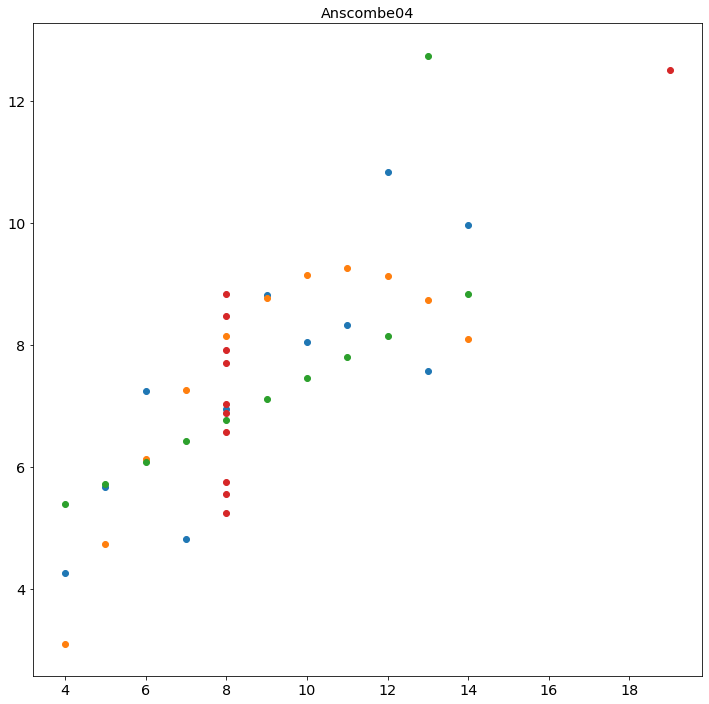

In [18]:
# Let us make some plots
plt.scatter(ans01.x, ans01.y)
plt.title('Anscombe01')
#plt.show()

plt.scatter(ans02.x, ans02.y)
plt.title('Anscombe02')
#plt.show()

plt.scatter(ans03.x, ans03.y)
plt.title('Anscombe03')
#plt.show()

plt.scatter(ans04.x, ans04.y)
plt.title('Anscombe04')
plt.show()

In [10]:
alldata=ans01.append([ans02,ans03,ans04])
xrange = ( min(alldata.x)-0.5,max(alldata.x)+0.5 )
yrange = ( min(alldata.y)-0.5,max(alldata.y)+0.5 )
print(xrange)
print(yrange)
print(type(xrange))

(3.5, 19.5)
(2.6, 13.24)
<class 'tuple'>


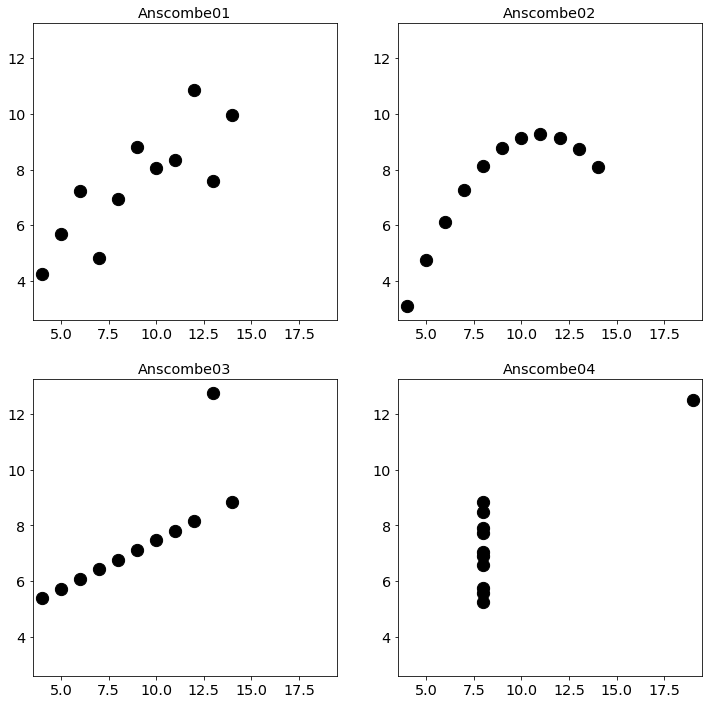

In [12]:
# Make plot larger
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 12),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make 4 plots in one
plt.subplot(2, 2, 1)
plt.scatter(ans01.x, ans01.y, s=150, c='k')
plt.xlim(xrange); plt.ylim(yrange)
plt.title('Anscombe01')

plt.subplot(2, 2, 2)
plt.scatter(ans02.x, ans02.y, s=150, c='k')
plt.xlim(xrange); plt.ylim(yrange)
plt.title('Anscombe02')

plt.subplot(2, 2, 3)
plt.scatter(ans03.x, ans03.y, s=150, c='k')
plt.xlim(xrange); plt.ylim(yrange)
plt.title('Anscombe03')

plt.subplot(2, 2, 4)
plt.scatter(ans04.x, ans04.y, s=150, c='k')
plt.title('Anscombe04')
plt.xlim(xrange); plt.ylim(yrange)
plt.show()

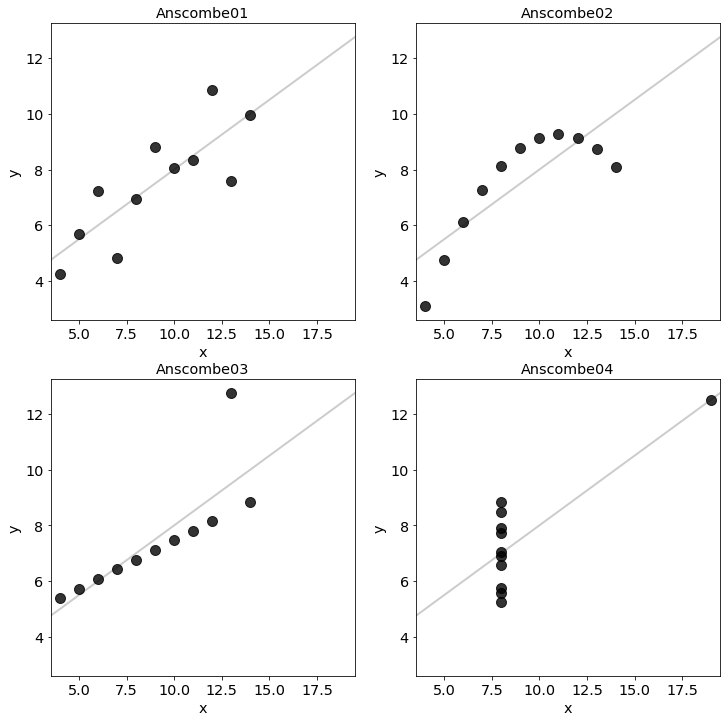

In [17]:
# sns.set_style("white")
#sns.axes_style("darkgrid")
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})

def niceplot(dataset):
    sns.regplot(x="x", y="y", data=dataset, ci=None, 
                scatter_kws={"color":"k","s": 100}, 
                line_kws={"color":"k", "alpha":0.2, "lw":2})
    
plt.subplot(2, 2, 1)
plt.xlim(xrange); plt.ylim(yrange) # <-- Problem! Solution: move xlim up
niceplot(ans01)
plt.title('Anscombe01')

plt.subplot(2, 2, 2)
plt.xlim(xrange); plt.ylim(yrange)
niceplot(ans02)
plt.title('Anscombe02')

plt.subplot(2, 2, 3)
plt.xlim(xrange); plt.ylim(yrange)
niceplot(ans03)
plt.title('Anscombe03')

plt.subplot(2, 2, 4)
plt.xlim(xrange); plt.ylim(yrange)                     
niceplot(ans04)
plt.title('Anscombe04')

plt.show()

### Superimpose plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


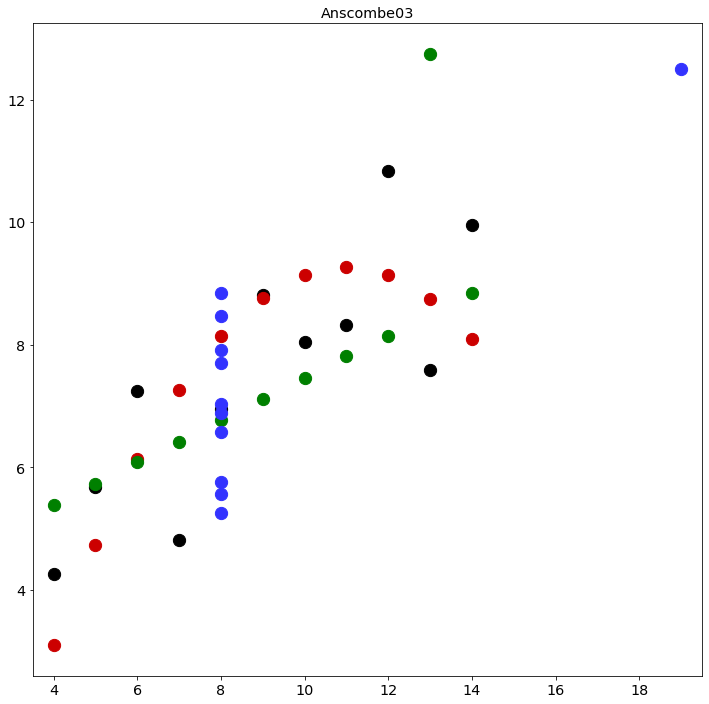

In [19]:
# Superimpose plots in one
plt.scatter(ans01.x, ans01.y, s=150, c='k')
plt.xlim(xrange); plt.ylim(yrange)

plt.scatter(ans02.x, ans02.y, s=150, c=[[0.8,0,0]])
plt.xlim(xrange); plt.ylim(yrange)

plt.scatter(ans03.x, ans03.y, s=150, c=[[0,0.5,0]])
plt.xlim(xrange); plt.ylim(yrange)
plt.title('Anscombe03')

plt.scatter(ans04.x, ans04.y, s=150, c=(0.2,0.2,1))
# There is a warning --> neat trick to correct this
plt.xlim(xrange); plt.ylim(yrange)
plt.show()

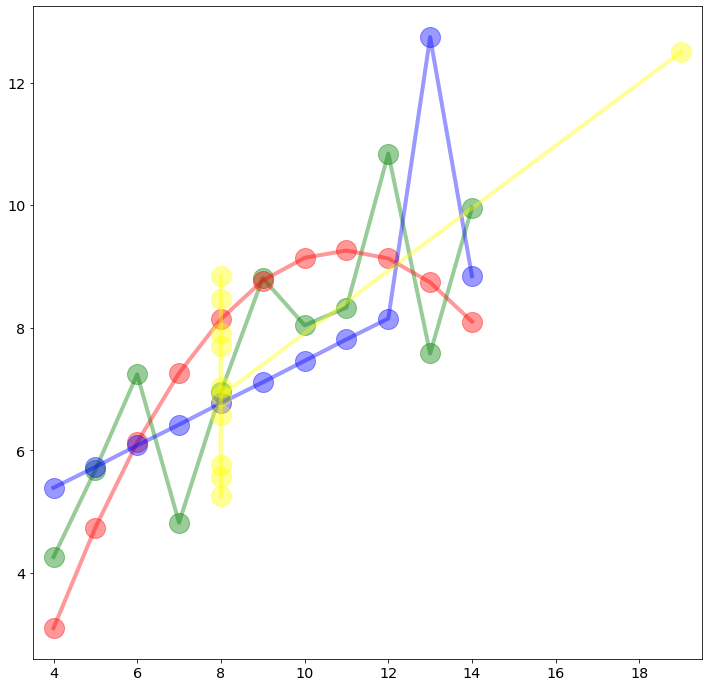

In [23]:
# Better version
def niceplot(dataset,myC):
    dataSorted = dataset.sort_values(by=['x'])
    plt.plot(dataSorted.x, dataSorted.y,  
             '-o', c=myC, lw=4, ms=20, alpha=0.4)
    
plt.subplots()
niceplot(ans01, (0,.5,0))
niceplot(ans02, (1,0,0))
niceplot(ans03, (0,0,1))
niceplot(ans04, (1,1,0))
plt.xlim(xrange); plt.ylim(yrange)
plt.show()


## A simple dataset: student grades, gender and nationality

In [24]:
student = pd.read_csv('Student.csv'); 
student.head().style.hide_index()

country,gender,math,stats,econ,arts
DE,male,5.48,5.08,4.57,3.93
DE,male,3.98,4.08,4.07,5.43
DE,male,3.48,4.08,5.07,5.43
DE,male,3.98,4.58,5.57,4.93
DE,male,5.98,6,5.57,3.93


In [25]:
# A quick look at the data set
student.shape[0]
student.describe()

,math,stats,econ,arts
count,93.000000,93.000000,93.000000,93.000000
mean,4.668172,4.816989,5.125484,4.725699
std,1.052724,0.856393,0.626346,1.016806
min,2.480000,3.080000,4.070000,2.930000
25%,3.980000,4.080000,4.570000,3.930000
50%,4.480000,5.080000,5.070000,4.930000
75%,5.480000,5.580000,5.570000,5.430000
max,5.980000,6.000000,6.000000,5.930000


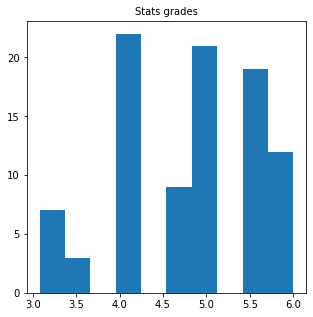

In [27]:
# Histogram

params = {'legend.fontsize': 'medium',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

# First try (--> not very nice)
plt.hist(student.stats)
plt.title('Stats grades')
plt.show()

In [28]:
# Have a look at the help text
?plt.hist

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays


In [29]:
# Hide the (long) help text
# Specify bins
print(list(range(1,7)))
myBins = np.arange(2.01,6.51,0.5)
print(myBins)

[1, 2, 3, 4, 5, 6]
[2.01 2.51 3.01 3.51 4.01 4.51 5.01 5.51 6.01]


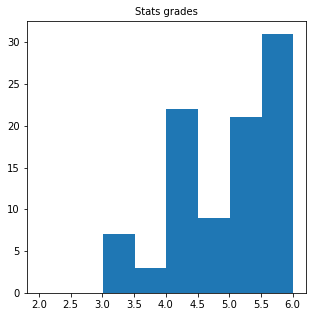

In [30]:
# Second try
plt.hist(student.stats, bins=myBins)
plt.title('Stats grades')
plt.show()

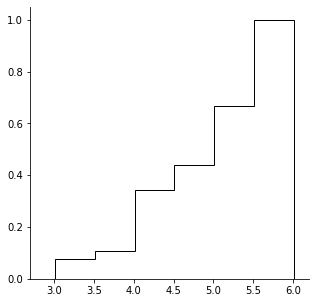

In [33]:
# Alternative version
# I chose not to include a title. Why?
plt.hist(student.stats, 
         bins=myBins, 
         density=True, cumulative=True,
        histtype='step', edgecolor="k")
plt.xlim(2.7,6.2)
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
### Show multiple plots
subjects=['math','stats','econ']
for k in range(0,3):
    plt.subplot(1, 3, k+1)
    plt.hist(student[subjects[k]], 
         bins=myBins, 
         density=True, cumulative=True,
        histtype='step', edgecolor="k")
    plt.xlim(2.7,6.2)
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

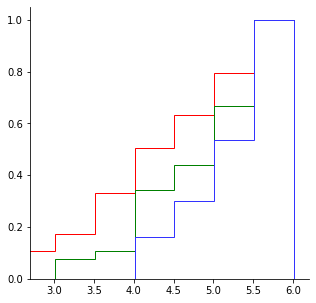

In [34]:
### Show multiple plots (2)
subjects=['math','stats','econ']
colors=[[1,0,0],[0,0.5,0],[0.2,0.2,1]]
for k in range(0,3):
    plt.hist(student[subjects[k]], 
         bins=myBins,
         density=True, cumulative=True,
        histtype='step', edgecolor=colors[k])
    plt.xlim(2.7,6.2)
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

## Extra: parts of a whole visualizations

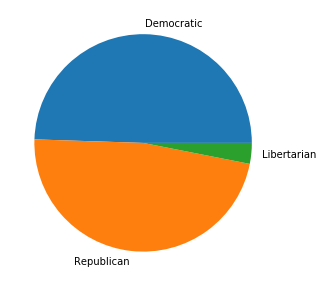

In [36]:
data = pd.DataFrame({'prc':[48, 46, 3],
                     'party':['Democratic', 'Republican', 'Libertarian']})
plt.pie(data.prc, labels=data.party)
plt.show()

### * Now add the following ...*
* Add these colors `("#983D3D", "#232066", "#DCB732")`
* Add the category "Other" with 4% of the votes
* "Other" should be grey (#606060)
* Use the help function (`?plt.pie`) to solve the following questions
* Rearrange the order of the parties to create an engaging visualization. *Hint:* use the `startangle` argument
* Highlight the fact that "Other" candidates may have cost the vitory to Hillary Clinton. *Hint:* use  the `explode` argument
* Find at lease one completley useless option of the pie chart and discuss it briefly

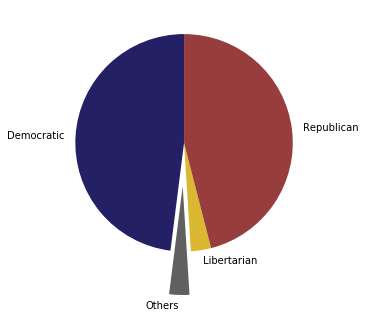

Signature:
plt.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=None,
    radius=None,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
the fractional area directly and the array will not be normalized. The
resulting pie will have an empty wedge of size ``1 - sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : array-like
    The wedge sizes.

explode : array-like, optional, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, optional, default: None
    A

In [38]:
# Python code goes here
data = pd.DataFrame({'prc':[48, 3, 3, 46, ],
                     'party':['Democratic', 'Others', 'Libertarian', 'Republican']})
plt.pie(data.prc, labels=data.party,
       colors= ('#232066', '#606060','#DCB732', '#983D3D'),
       explode=[0,0.4,0,0], startangle=90)
plt.show()
# For example shadow=True
?plt.pie

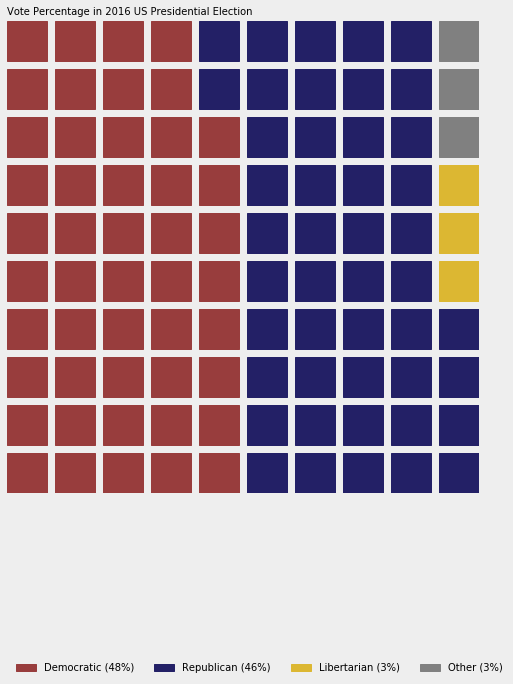

In [42]:
# This requires
# pip install pywaffle
params = {'legend.fontsize': 'medium',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

from pywaffle import Waffle
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3, 'Other': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732", "#808080"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 
            'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

### PDF output

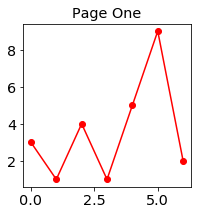

In [14]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('foo.pdf') as pdf:
    plt.figure(figsize=(3, 3))
    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], 'r-o')
    plt.title('Page One')
    pdf.savefig()
